In [27]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

In [14]:
boston = load_boston()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [15]:
x = boston.data
y = boston.target

In [19]:
x = (x-x.min())/(x.max() - x.min())

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2022,shuffle = True)

In [21]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
result = {}
result['KNN'] = cv_score.mean()
print(cv_score)

0.4411247577907321
[0.46064762 0.53463548 0.53271634 0.428293   0.35113515 0.32001952
 0.55936643 0.3933428  0.2158801  0.61521115]


In [22]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
result['Tree'] = cv_score.mean()
print(cv_score)

0.7317561224756657
[0.80766527 0.79936812 0.84928259 0.74340951 0.67038089 0.25543032
 0.84316166 0.75159768 0.76276978 0.8344954 ]


In [23]:
model = LinearRegression()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
result['LinearR']  = cv_score.mean()
print(cv_score)

0.6979110071590411
[0.60111914 0.80415093 0.72032973 0.77772325 0.46198646 0.60611024
 0.6781901  0.75249854 0.78569936 0.79130233]


In [24]:
model = SVR()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
result['SVR'] = cv_score.mean()
print(cv_score)

0.13872823990713629
[ 0.05605412  0.27643069  0.08700447  0.23525336 -0.10935184  0.40060793
  0.15456373 -0.12046515  0.22583749  0.18134759]


In [30]:
model = XGBRegressor()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
result['XGBR'] = cv_score.mean()
print(cv_score)

0.8641092533222974
[0.83314349 0.87118132 0.93172808 0.87835015 0.78006309 0.72219461
 0.91036556 0.87080739 0.91766872 0.92559012]


In [26]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
result['Forest'] = cv_score.mean()
print(cv_score)

0.8617285332809861
[0.87240439 0.8877497  0.92699647 0.83646344 0.79203136 0.75661888
 0.82837443 0.85703714 0.90900488 0.95060464]


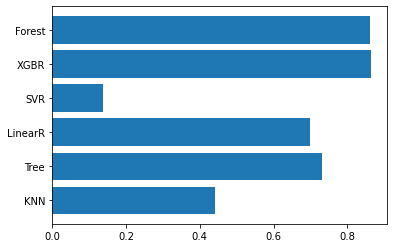

In [29]:
plt.barh(y=list(result), width = result.values())
plt.show()

In [32]:
model_xg = XGBRegressor()

params = {'n_estimators' : range(5,11),
         'max_depth' : range(3,15)}

model = GridSearchCV(model_xg,
                    params,
                    cv = 10,
                    scoring = 'r2')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 10, 'n_estimators': 10}
0.8459479307161661


In [34]:
print(r2_score(y_test, y_pred))

0.8389229419415161
